In [37]:
# Importing necessary libraries
import numpy as np
import re
import os
import pandas as pd
import matplotlib.pylab as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Reading the text file
file1 = open("p2p-Gnutella04.txt","r+")
text = file1.read()

In [39]:
# Getting the length of the unnecessary part
s='''# Directed graph (each unordered pair of nodes is saved once): p2p-Gnutella04.txt 
# Directed Gnutella P2P network from August 4 2002
# Nodes: 10876 Edges: 39994
# FromNodeId	ToNodeId'''
print(len(s))

183


In [40]:
# Slicing the string to remove the unnecessary part
s=text[184:]
for i in s:
  print(i)
  break

0


In [41]:
# Re-writing the new sliced string to the file
f = open("preprocessed_p2p-Gnutella.txt", "w")
f.write(s)
f.close()

In [42]:
# Reading the txt file as csv 
temp_df = pd.read_csv('preprocessed_p2p-Gnutella.txt', sep = '\t')
columns = ['FromNodeId','ToNodeId']
df = temp_df.to_csv ('f.csv', index=None)
df = pd.read_csv('f.csv',header=None, names=columns)
df.head()

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [43]:
len(df)

39994

In [44]:
# Function to sort 
def to_sort(d):
  myKeys = list(d.keys())
  myKeys.sort()
  df_d = {i: d[i] for i in myKeys}
  return df_d

In [45]:
# Function to convert to two different list from dictionary
def to_list(d):
  node=[]
  score=[]
  c=0
  for i in d:
    # print(i)
    c+=1
    node.append(i)
    score.append(d[i])
    # if c==4:
    #   break

  # print(node_pr,score_pr)
  return node,score
  # len(node_pr),len(score_pr)

In [46]:
df.shape

(39994, 2)

In [47]:
# Creating the graph
G = nx.DiGraph()
for i in range(0,df.shape[0]):
  G.add_edge(df['FromNodeId'][i],df['ToNodeId'][i])

In [48]:
print(G.number_of_edges(),G.number_of_nodes())

39994 10876


In [49]:
# Using the in built library to get the Pagerank
pagerank = nx.pagerank(G)
df_pagerank=to_sort(pagerank)
node_pr,score_pr=to_list(df_pagerank)

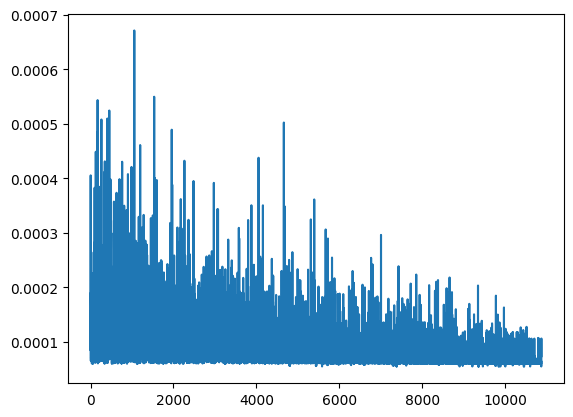

In [50]:
# Plot of Pagerank
plt.plot(node_pr,score_pr)
plt.show()

In [51]:
# Using the in built library to get the Hub and Authority
hub, authority = nx.hits(G)

In [52]:
df_hub=to_sort(hub)
df_authority=to_sort(authority)
node_hub,score_hub=to_list(df_hub)
node_authority,score_authority=to_list(df_authority)

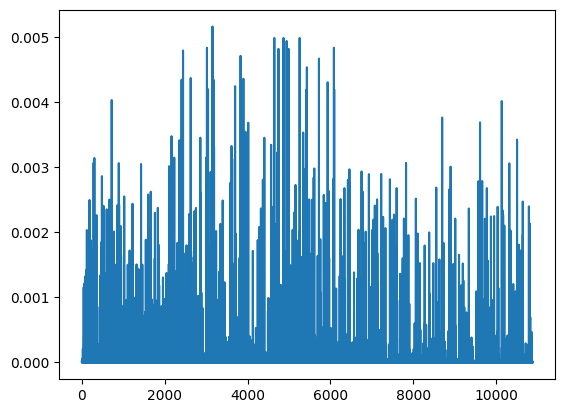

In [53]:
# Plot of Hub
plt.plot(node_hub,score_hub)
plt.show()

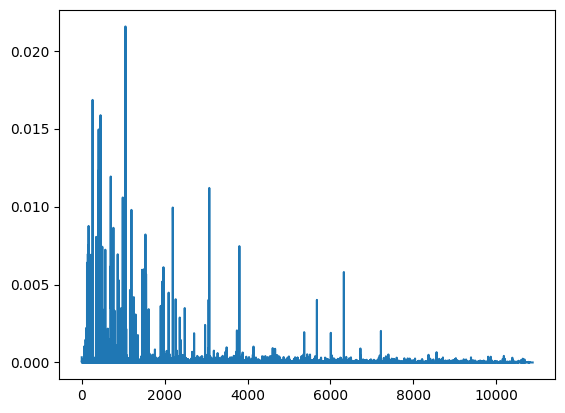

In [54]:
# Plot of Authority
plt.plot(node_authority,score_authority)
plt.show()

In [55]:
# c=5
# for i in range(c):
#   if(node_pr[i]==node_hub[i] and node_authority[i]==node_pr[i]):
#     print(i,end=" &&&&")
#   print(node_pr[i],score_pr[i] , end= " --- ")
#   print(node_hub[i],score_hub[i],end= " *** ")
#   print(node_authority[i],score_authority[i])

In [56]:
# Converting to dataframe
final_df=pd.DataFrame()
final_df['Node']=node_pr
final_df['PageRank']=score_pr
final_df['Hub']=score_hub
final_df['Authority']=score_authority
final_df.head()

,Node,PageRank,Hub,Authority
0,0,0.000121,0.000020,0.000332
1,1,0.000085,0.000020,0.000012
2,2,0.000136,-0.000000,0.000035
3,3,0.000122,0.000021,0.000045
4,4,0.000405,-0.000000,0.000121


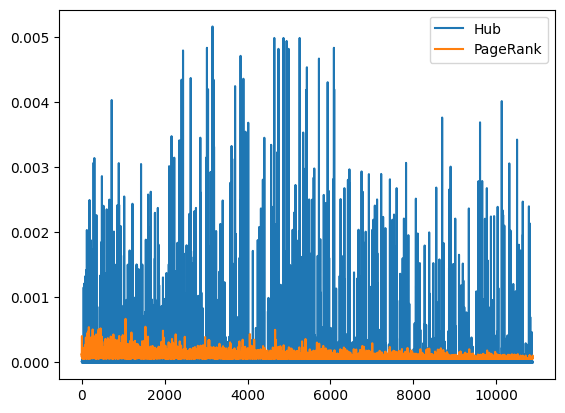

In [57]:
# Comparison between PageRank and Hub
plt.plot(final_df['Node'],final_df['Hub'],label='Hub')
plt.plot(final_df['Node'],final_df['PageRank'],label='PageRank')
plt.legend()
plt.show()

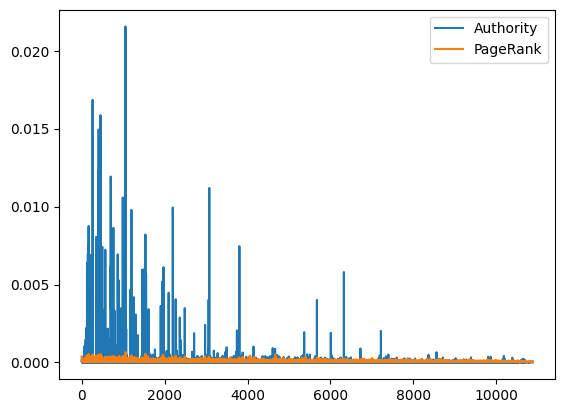

In [58]:
# Comparison between PageRank and Authority
plt.plot(final_df['Node'],final_df['Authority'],label='Authority')
plt.plot(final_df['Node'],final_df['PageRank'],label='PageRank')
plt.legend()
plt.show()